In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,roc_curve, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split



#importing basic libraries which we though will help in model,remaning  will import when required.

In [5]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')


#First read dataset and make it a dataframe for better understanding 

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# now we will check dataset what our dataset is.There are 7 columns in which 6 columns are our features and 1 is our target charges.
#i found that bmi is only continous data in dataset.Remaning are categorical. 

In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#by using dtypes i will check which type of data we have.All data columns are ok as they are.We can process further.

In [15]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# using df unique we check uniqueness of data.There are:
#47 unique values in age, 2 in sex, 548 in bmi, 6 in children,4 regions charge is our target.



In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#now using isnull.sum check is there any null values present or not.we found no null values.

In [28]:
for x in df.columns:
    
    print(df[x].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [ ]:
#using for loop i try to find out how our data is distributed.How many values repeat how many times.
#age is widely distributed.I tried as taking age as contionus variable too but results i got is mostly same.In this model i take age as categoriacl data.
#sex is male and female only 2 options and balance data
#smoker is yes or no imbalance
#4 regoins balance data
#children is having 6 types of data which seems to be realistic data but less balance

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#describe data will share total overview of dataset.

# as most of columns are categorical we do not change anything but bmi is continous.
#i found some slight difference in 75%-100% data.

In [69]:
df['bmi'].skew()

0.2840471105987448

In [ ]:
#check skewness of bmi. and result is ok and under range.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


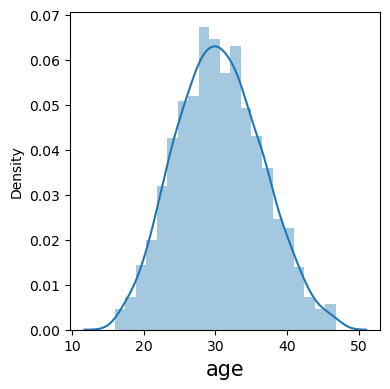

In [166]:
plt.figure(figsize=(4,4))
plotnumber=1

for bmi in df:
    if plotnumber < 2:
        sns.distplot(df['bmi'])
        plt.xlabel(bmi,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
#after ploting data found bell shaped and found no major issue as of now.But for being sure going to plot boxplot.

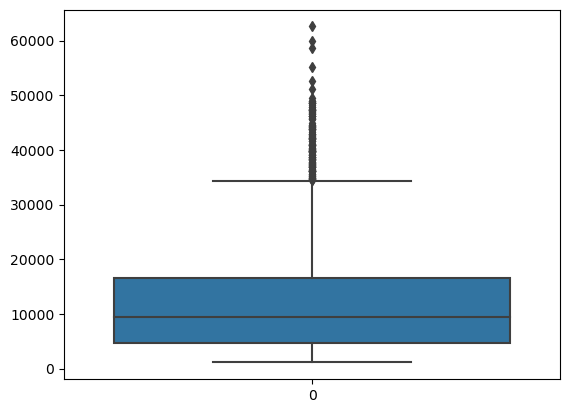

In [165]:
sns.boxplot(data=df[bmi])
plt.show()

In [ ]:
#here i found someoutliers.After checking and exploring on internt i found noraml bmi range.Outlier data is someting about 40+ which is not possible.
#So i decided to trim these outliers

In [76]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)


#and

iqr=q3-q1

In [77]:
print(q1)
print('\n')
print(q3)

age           27.00000
sex            0.00000
bmi           26.29625
children       0.00000
smoker         0.00000
region         1.00000
charges     4740.28715
Name: 0.25, dtype: float64


age            51.000000
sex             1.000000
bmi            34.693750
children        2.000000
smoker          0.000000
region          2.000000
charges     16639.912515
Name: 0.75, dtype: float64


In [78]:
bm=(q3['bmi']+(1.5*iqr['bmi']))
print(bm)

find=np.where(df['bmi']>bm)
df=df.drop(df.index[find])
df.shape
df.reset_index()

47.290000000000006


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,1,30.970,3,0,1,10600.54830
1325,1334,18,0,31.920,0,0,0,2205.98080
1326,1335,18,0,36.850,0,0,2,1629.83350
1327,1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
#after removing outliers our dataset have 1329 rows and 8 columns.Data seems to be ok so process further.Now Encode data in numerail format so that our model recognise it.
#Using label encoder to encode.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


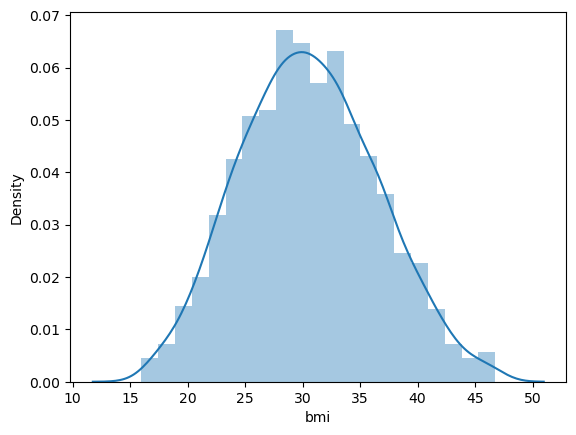

In [82]:
sns.distplot(df['bmi'])
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lab_enc=LabelEncoder()

In [52]:
df1=lab_enc.fit_transform(df['sex'])
df1

array([0, 1, 1, ..., 0, 0, 0])

In [53]:
df2=lab_enc.fit_transform(df['smoker'])
df2

df3=lab_enc.fit_transform(df['region'])
df3

array([3, 2, 2, ..., 2, 3, 1])

In [55]:
pd.Series(df1)
pd.Series(df2)




0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Length: 1338, dtype: int32

In [58]:
pd.Series(df3)

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Length: 1338, dtype: int32

In [64]:
df['sex']=df1

In [59]:
df['region']=df3

In [61]:
df['smoker']=df2

In [74]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [167]:
#after encoding our data is now ready for model building.Now i check for multicolinearity issue.

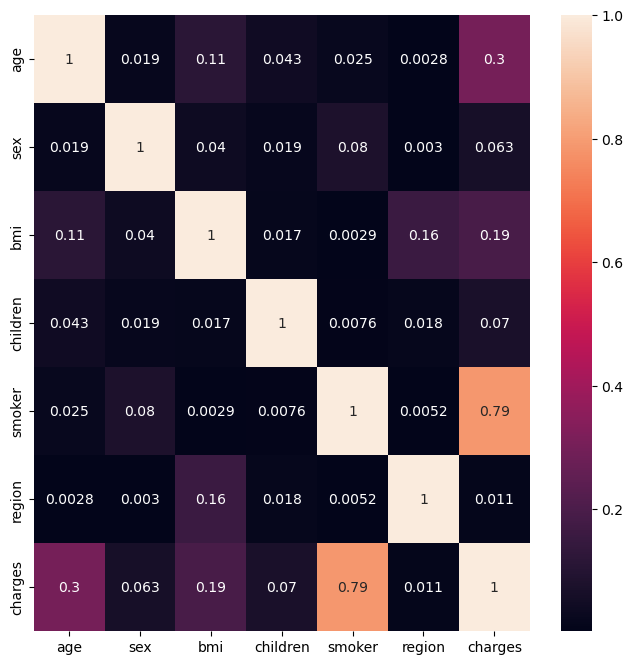

In [83]:
df_corr=df.corr().abs()

plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
#Smoker is highly co-related with tagret.Other are not as much related to target. 

In [84]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


In [ ]:
# for make sure i again use corr to confirm there is not another correlated thing left..And found nothing special to take care of.

In [86]:
X=df.drop('charges',axis=1)
y=df['charges']

In [ ]:
#drop target and put in another variable y and remaning in X.

In [85]:
from sklearn.preprocessing import StandardScaler

#standardize the data using standardscaler

In [87]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y, test_size=0.30,random_state=100)

#initiate train test split technique.

In [99]:
log_reg=LinearRegression()
log_reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
#first i choose to build linear regression initate and fit model

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

def metric_score(log_reg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = log_reg.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2}")
    else:
        y_pred = log_reg.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2}')

# Training and evaluating the regression model
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)
metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)



-------------Train Result---------

R-squared (R2) Score: 0.745434813340494

----------Test Score--------
R-squared (R2) Score: 0.7569837103407062


In [168]:
#create a function to find out accuracy score(r2 score)
#train result is 74% and test score is 75%

In [120]:
d_reg=DecisionTreeRegressor()

In [121]:
d_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#another model decision tree 

In [124]:
from sklearn.metrics import r2_score

def metric_score(d_reg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = d_reg.predict(x_train)
        
        r2 = r2_score(y_train, y_pred)
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2*100}%")
    else:
        y_pred = d_reg.predict(x_test)
        
        r2 = r2_score(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2*100}%',)

metric_score(d_reg, x_train, x_test, y_train, y_test, train=True)
metric_score(d_reg, x_train, x_test, y_train, y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 99.80729919973172%

----------Test Score--------
R-squared (R2) Score: 74.76554547402938%


In [ ]:
#use same function and get r2 train and test result something differnt.
#try to use some Cv in model so import LASSOCV

In [125]:
from sklearn.linear_model import Lasso, LassoCV

In [126]:
lassocv=LassoCV(alphas=None, max_iter=15)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=15)

In [128]:
alpha=lassocv.alpha_
alpha

62.08601003989981

In [129]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=62.08601003989981)

In [130]:
lasso_reg.score(x_test,y_test)

0.7584209644108348

In [ ]:
#after implimenting lasso cv not much score increased but a little bit.

In [148]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [149]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
#third model knn model

In [154]:
def metric_score(d_reg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = d_reg.predict(x_train)
        
        r2 = r2_score(y_train, y_pred)
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2*100}%")
    else:
        y_pred = d_reg.predict(x_test)
        
        r2 = r2_score(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2*100}%',)




-------------Train Result---------

R-squared (R2) Score: 99.80729919973172%

----------Test Score--------
R-squared (R2) Score: 74.76554547402938%


In [155]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True)
metric_score(knn,x_train,x_test,y_train,y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 87.04823993951155%

----------Test Score--------
R-squared (R2) Score: 82.55496785713711%


In [ ]:
#knn model gives best accuracy in both train and test as 87% and 82%

In [ ]:
#try to improve more using GRIDSEARCHCV method

In [131]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid={'algorithm':['kd_tree','brute'],
                         'leaf_size':[3,4,5,6],
             'n_neighbors':[3,5,6,7,9]}

In [156]:
grid=GridSearchCV(estimator=knn,
                  param_grid=param_grid)

In [157]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6],
                         'n_neighbors': [3, 5, 6, 7, 9]})

In [158]:
grid.best_score_

0.8049717084934622

In [159]:
grid.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [161]:
knn=KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [162]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [163]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True)
metric_score(knn,x_train,x_test,y_train,y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 85.24014275415557%

----------Test Score--------
R-squared (R2) Score: 82.56852096421233%


In [ ]:
#after appling hyperparameter tunning i got these results

In [170]:
import pickle

In [173]:
pickle.dump(df,open('model2','wb'))